# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

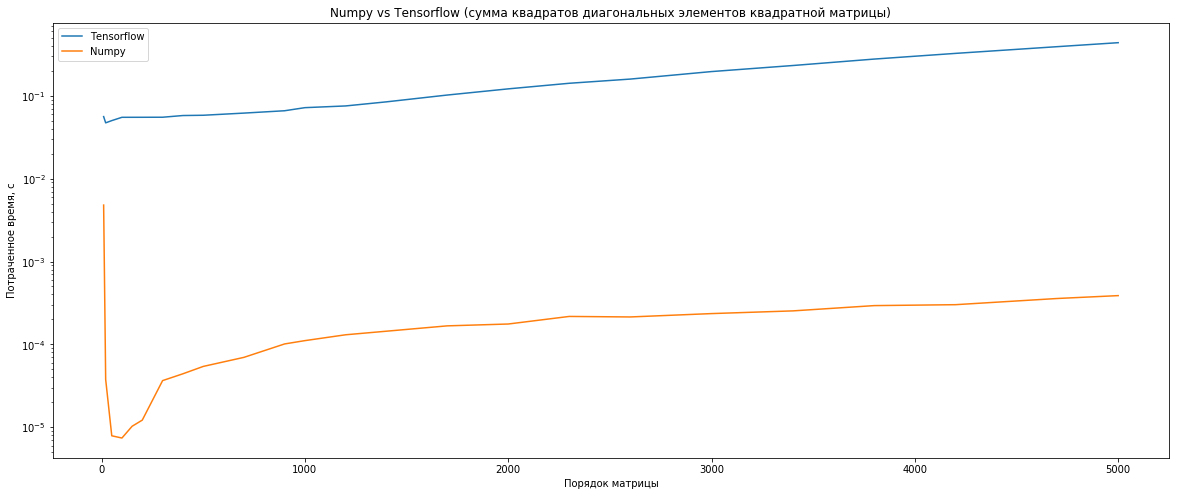

In [0]:
import time

sess = tf.Session()
sizes = [10, 20, 50, 100, 150, 200, 300, 400, 500, 700, 900, 1000, 1200, 1400, 1700, 2000, 2300, 2600, 3000, 3400, 3800, 4200, 4700, 5000]
timelist = []
timelistn = []

for n in sizes:
    x = tf.random.normal([n, n])# define array(-s) of size n
    ...
    y = tf.reduce_sum(tf.diag_part(x)**2)
    ...
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    timelist.append(time_spent)
    ...

# The same but for numpy
...
for n in sizes:
    xn = np.random.randn(n,n)
    begin = time.time()
    yn = np.sum(xn.diagonal() ** 2)
    end = time.time()
    time_spent = end - begin
    timelistn.append(time_spent)

plt.figure(figsize=(20, 8))
line1, = plt.plot(sizes, timelist)
line2, = plt.plot(sizes, timelistn)
plt.xlabel('Порядок матрицы')
plt.ylabel('Потраченное время, с')
plt.title('Numpy vs Tensorflow (сумма квадратов диагональных элементов квадратной матрицы)')
plt.legend([line1,line2], ['Tensorflow', 'Numpy'], loc = 'best')
plt.yscale('log')
plt.show()


sess.close()

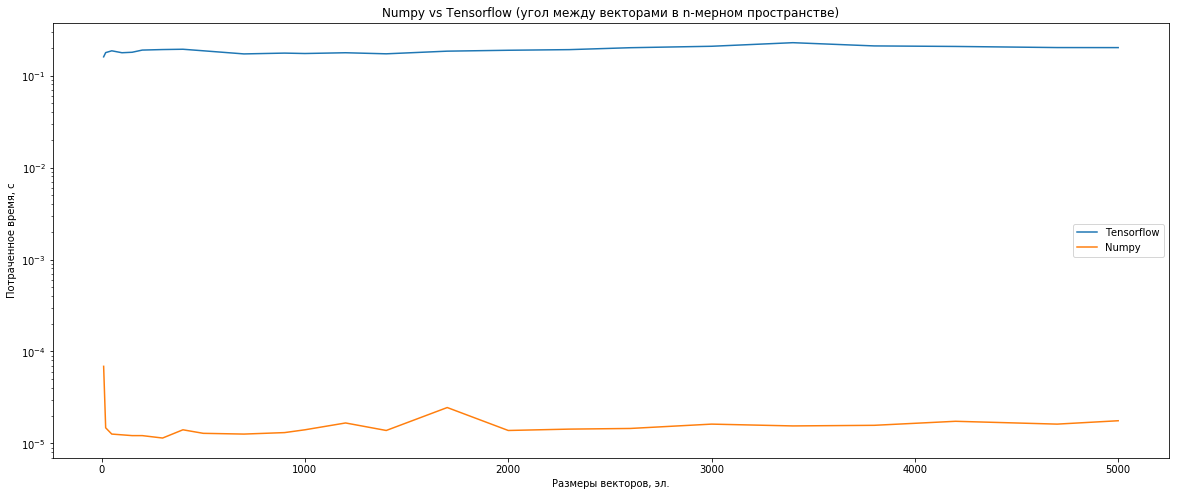

In [0]:
timelist.clear()
timelistn.clear()
sess = tf.Session()

for n in sizes:
    x = tf.random.normal([1, n])# define array(-s) of size n
    y = tf.random.normal([n, 1])
    ...
    s = tf.acos(tf.matmul(x,y)/(tf.linalg.norm(x)*tf.linalg.norm(y)))
    ...
    begin = time.time()
    sess.run(s)
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    timelist.append(time_spent)
    ...

# The same but for numpy
...
for n in sizes:
    xn = np.random.randn(1,n)
    yn = np.random.randn(n,1)
    begin = time.time()
    sn = np.arccos(np.dot(xn,yn)/(np.linalg.norm(xn)*np.linalg.norm(yn)))
    end = time.time()
    time_spent = end - begin
    timelistn.append(time_spent)

plt.figure(figsize=(20, 8))
line1, = plt.plot(sizes, timelist)
line2, = plt.plot(sizes, timelistn)
plt.xlabel('Размеры векторов, эл.')
plt.ylabel('Потраченное время, c')
plt.title('Numpy vs Tensorflow (угол между векторами в n-мерном пространстве)')
plt.legend([line1,line2], ['Tensorflow', 'Numpy'], loc = 'best')
plt.yscale('log')
plt.show()


sess.close()

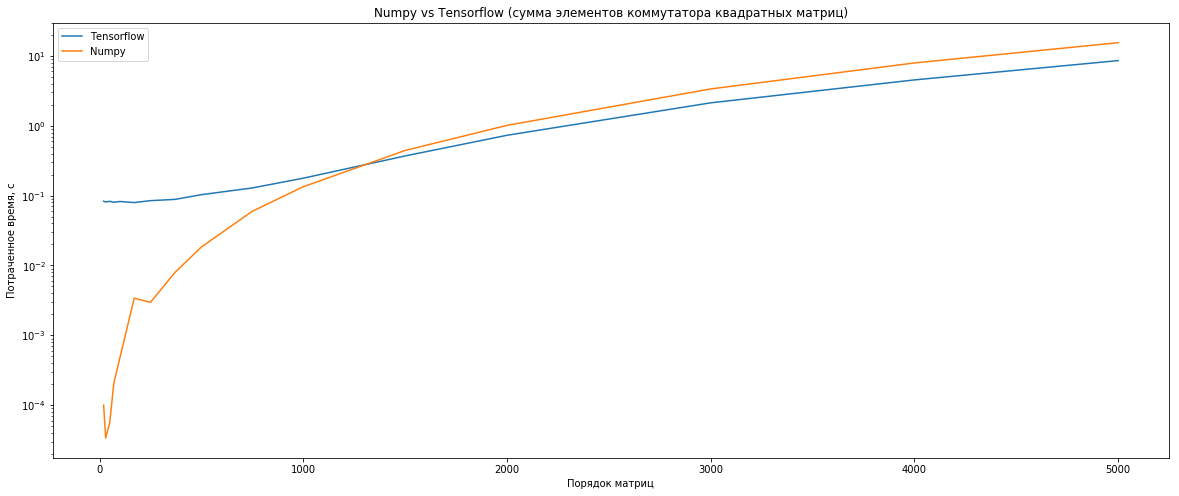

In [0]:
timelist.clear()
timelistn.clear()
sess = tf.Session()
dotsizes = [20, 30, 50, 70, 100, 170, 250, 370, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000]

for n in dotsizes:
    x = tf.random.normal([n, n])# define array(-s) of size n
    y = tf.random.normal([n, n])
    ...
    s = tf.reduce_sum(tf.matmul(x,y)-tf.matmul(y,x))
    ...
    begin = time.time()
    sess.run(s)
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    timelist.append(time_spent)
    ...

# The same but for numpy
...
for n in dotsizes:
    xn = np.random.randn(n,n)
    yn = np.random.randn(n,n)
    begin = time.time()
    sn = np.sum(np.dot(xn,yn) - np.dot(yn,xn))
    end = time.time()
    time_spent = end - begin
    timelistn.append(time_spent)

plt.figure(figsize=(20, 8))
line1, = plt.plot(dotsizes, timelist)
line2, = plt.plot(dotsizes, timelistn)
plt.xlabel('Порядок матриц')
plt.ylabel('Потраченное время, c')
plt.title('Numpy vs Tensorflow (сумма элементов коммутатора квадратных матриц)')
plt.legend([line1,line2], ['Tensorflow', 'Numpy'], loc = 'best')
plt.yscale('log')
plt.show()


sess.close()

В первом и втором заданиях Numpy оказывается сильно быстрее Tensorflow, однако в третьем при больших размерах матриц время работы Tensorflow меньше, чем Numpy. В первых двух заданиях проводятся операция над квадратной матрицей и умножение векторов, Numpy был создан для таких простых операций, но в третьем задании присутствует матричное умножение и Tensorflow начинает обгонять Numpy за счёт графа вычислений, оптимизирующего расчёты.

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [0]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [0]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

In [0]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

Ошибки на последней итерации : 
Momentum 0.1 :  0.10143957
Momentum 0.3 :  0.096154235
Momentum 0.5 :  0.09298589
Momentum 0.72 :  0.08877996
Momentum 0.8 :  0.08640101
Momentum 0.85 :  0.06592144
Momentum 0.88 :  0.05011039
Momentum 0.9 :  0.07606922
Momentum 0.95 :  0.15559867


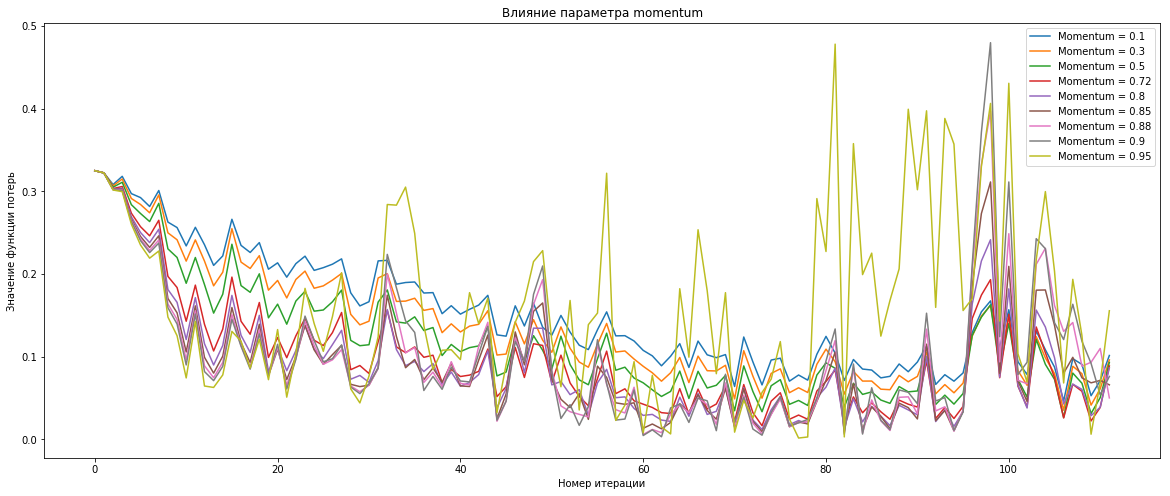

In [0]:
# YOUR CODE !
plt.figure(figsize=(20, 8))
plt.title('Влияние параметра momentum')
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции потерь')
lines = []
result = []
labels = []

#for i in np.linspace(0.5, 0.92, 7):
print("Ошибки на последней итерации : ")
for i in [0.1, 0.3, 0.5, 0.72, 0.8, 0.85, 0.88, 0.9, 0.95]:
  train_op = tf.train.MomentumOptimizer(learning_rate=0.01, momentum = i).minimize(loss)
  result = train(X, y, train_op)
  lines.append(plt.plot(np.arange(len(result)), result)[0])
  labels.append('Momentum = ' + str(i))
  print("Momentum "+str(i)+" : ", result[-1])
plt.legend(lines, labels, loc = 'best')

In [0]:
best_momentum = 0.88

Ваш ответ: Количество итераций для каждого прогона одинаково. Как видно из графиков, наименьшее значение функции потерь на последней итерации имеет алгоритм с momentum = 0.88

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

Ошибки на последней итерации : 
Learning_rate 0.001 :  0.1018403
Learning_rate 0.005 :  0.091200806
Learning_rate 0.01 :  0.05011039
Learning_rate 0.015 :  0.23144822
Learning_rate 0.02 :  0.16091716
Learning_rate 0.03 :  0.5611239
Learning_rate 0.1 :  1.1446017
Learning_rate 0.5 :  2.8206668


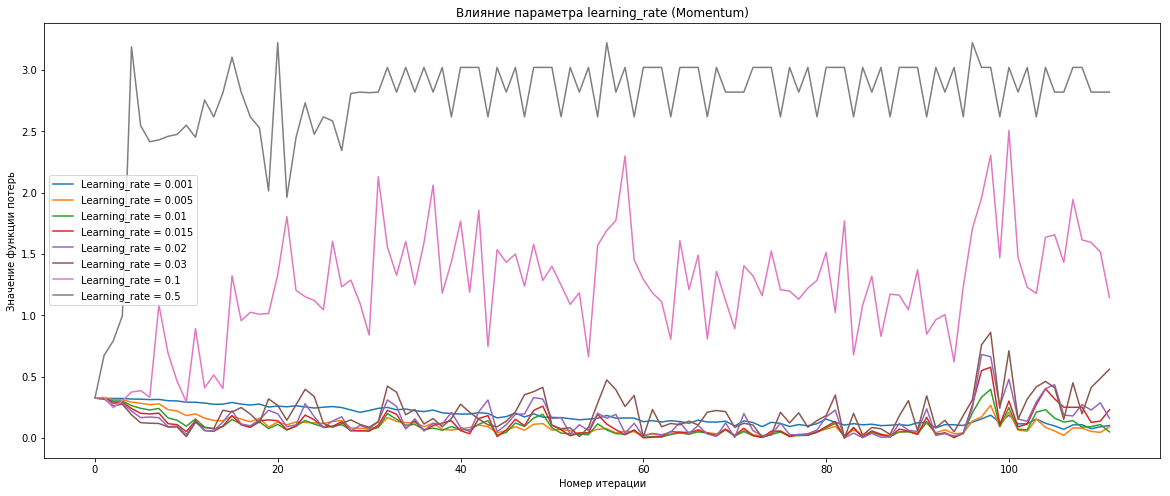

In [0]:
# YOUR CODE !
plt.figure(figsize=(20, 8))
plt.title('Влияние параметра learning_rate (Momentum)')
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции потерь')
lines = []
result1 = []
labels = []

#for i in np.arange(0.001, 0.02, 0.003):
print("Ошибки на последней итерации : ")
for i in [0.001, 0.005, 0.01, 0.015, 0.02, 0.03, 0.1, 0.5]:
  train_op = tf.train.MomentumOptimizer(learning_rate = i, momentum = best_momentum).minimize(loss)
  result1 = train(X, y, train_op)
  lines.append(plt.plot(np.arange(len(result1)), result1)[0])
  labels.append('Learning_rate = ' + str(i))
  print("Learning_rate "+str(i)+" : ", result1[-1])
plt.legend(lines, labels, loc = 'best')

In [0]:
best_learning_rate = 0.01

Ваш ответ: При выбранном momentum = 0.88 learning_rate-ом с наименьшим значением функции потерь на последней итерации является 0.01

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

Ошибки на последней итерации : 
Learning_rate 0.001 :  0.07184082
Learning_rate 0.002 :  0.07014881
Learning_rate 0.003 :  0.084949836
Learning_rate 0.005 :  0.106863186
Learning_rate 0.01 :  0.07374099
Learning_rate 0.015 :  0.114837505
Learning_rate 0.02 :  0.17121014
Learning_rate 0.1 :  1.8132858


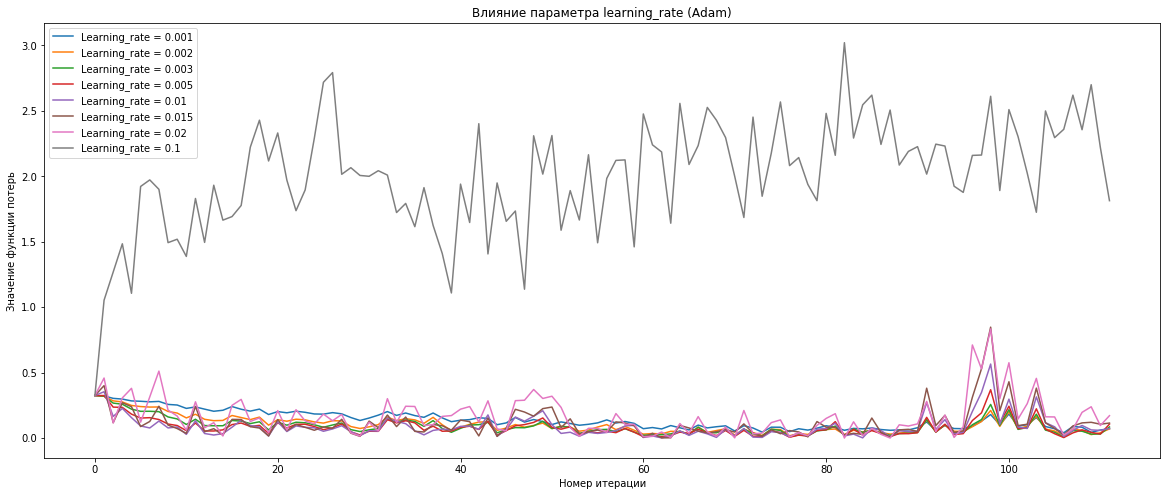

In [0]:
# YOUR CODE !
# YOUR CODE !
plt.figure(figsize=(20, 8))
plt.title('Влияние параметра learning_rate (Adam)')
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции потерь')
lines.clear()
result2 = []
labels.clear()

print("Ошибки на последней итерации : ")
for i in [0.001, 0.002, 0.003, 0.005, 0.01, 0.015, 0.02, 0.1]:
  train_op = tf.train.AdamOptimizer(learning_rate = i).minimize(loss)
  result2 = train(X, y, train_op)
  lines.append(plt.plot(np.arange(len(result2)), result2)[0])
  labels.append('Learning_rate = ' + str(i))
  print("Learning_rate "+str(i)+" : ", result2[-1])
plt.legend(lines, labels, loc = 'best')

In [0]:
adam_learning_rate = 0.002

Ваш ответ: Лучшим learning_rate-ом является 0.002

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

,count,mean,std,min,25%,50%,75%,max,Loss(last iter),Time
Momentum,112.0,0.099384,0.082095,0.005855,0.040171,0.082132,0.131015,0.397283,0.050110,0.348333
Adam,112.0,0.102403,0.065922,0.017712,0.056371,0.085174,0.135355,0.325083,0.070149,0.356301


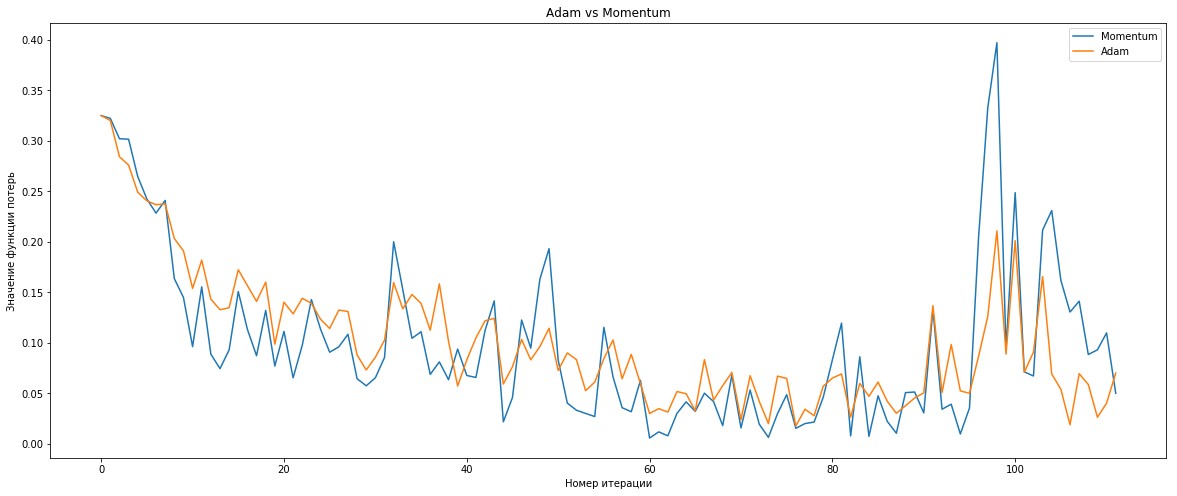

In [0]:
# YOUR CODE ! 
import pandas as pd
train_op = tf.train.AdamOptimizer(learning_rate = adam_learning_rate).minimize(loss)
begin = time.time()
ad = train(X, y, train_op)
end = time.time()
time_ad = end - begin
train_op = tf.train.MomentumOptimizer(learning_rate = best_learning_rate, momentum = best_momentum).minimize(loss)
begin = time.time()
mom = train(X, y, train_op)
end = time.time()
time_mom = end - begin
line2 = []
plt.figure(figsize=(20, 8))
plt.title('Adam vs Momentum')
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции потерь')
line2.append(plt.plot(np.arange(len(mom)), mom)[0])
line2.append(plt.plot(np.arange(len(ad)), ad)[0])
plt.legend(line2, ["Momentum", "Adam"], loc = 'best')
d = {'Momentum': mom, 'Adam': ad}
data = pd.DataFrame(data=d)
data=data.describe().transpose().head()
data['Loss(last iter)'] = [mom[-1], ad[-1]]
data['Time'] = [time_mom, time_ad]
data.head()

Ваш ответ: MomentumOptimizer с выбранными в предыдущих пунктах параметрами дает меньшее значение функции потерь на последней итерации и выполняется чуть быстрее. Возможно, что так получается из за того, что в данной задаче данные это картинки, то есть матрица нулей(где фон) и значений > 0, а Adam вычисляет скорость обучения для каждого параметра отдельно, что в данной задаче не нужно.

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [0]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

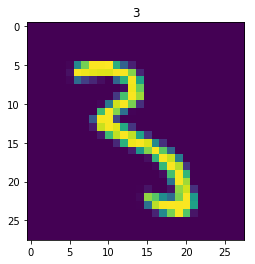

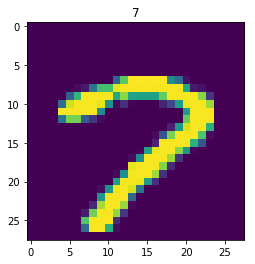

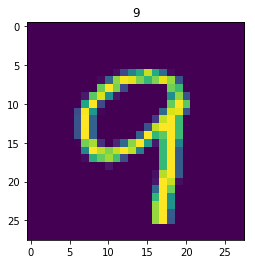

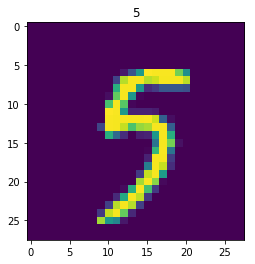

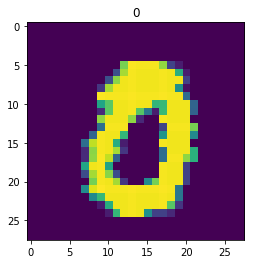

In [0]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [0]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(3):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        #for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]
...
layer1 = tf.layers.dense(X_input, 280, activation = tf.nn.relu)#<define architecture as a function of X_input>
layer2 = tf.layers.dense(layer1, 64, activation = tf.nn.relu)
layer3 = tf.layers.dense(layer2, 64, activation = tf.nn.relu)
logits = tf.layers.dense(layer3, 10)#<define 10-class outputs>
predicted = tf.nn.softmax(logits)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf.one_hot(y_input, depth=10))#<define log loss with one-hot vector of labels
train_op = tf.train.AdamOptimizer().minimize(loss)#<define train operation here>
loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  0.9516
Test accuracy:  0.9702
Test accuracy:  0.9754


Комментарий: Было изменено количество эпох до трёх. Так как мы используем градиентный спуск, который обновляет веса каждый проход, нам может быть недостаточно одной эпохи - все данные прошли туда-обратно через нейронную сеть единожды, то есть веса обновились один раз. С увеличением количества эпох веса обновляются все большее количество раз, приводя к повышению accuracy до нужного значения.

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

![alt text]( https://docs.google.com/uc?export=download&id=1LkDrIBAzWzhbEO67AtCkJ_lR9YPutJbc)![alt text](https://docs.google.com/uc?export=download&id=1wSwS5K1-5Xx1gA9B9ez-JD7LzeMBgw5_)

![alt text](https://docs.google.com/uc?export=download&id=1IzgSl6ETjYnTMN55y0Gx8rhAhX0343rd)


![alt text](https://docs.google.com/uc?export=download&id=1DAmz2vjgc-c0eRVcdXsrUIjT0k-Ftyn-)

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

Курс нормальный, интересный. По заданию: нам разрешили использовать несколько эпох, но все же интересно, как можно сделать с одной эпохи 97.5?)